<a href="https://colab.research.google.com/github/Sanjay7127/OASIS_INTERNSHIP/blob/main/OASIS_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-2 : UNEMPLOYMENT ANALYSIS WITH PYTHON


  Author : Prakash sanjay palani

  Batch : January phase 1 AICTE OIB-SIP 2025
  
  Domain : Data Science

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [26]:
import zipfile
import pandas as pd

zip_file_path = '/content/unemployment_dataset.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()

    chosen_file = 'Unemployment in India.csv'

    if chosen_file not in file_names:
        raise ValueError(f"File '{chosen_file}' not found in the zip archive.")
    with zip_ref.open(chosen_file) as file:
        df = pd.read_csv(file)

print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [27]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [29]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [30]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


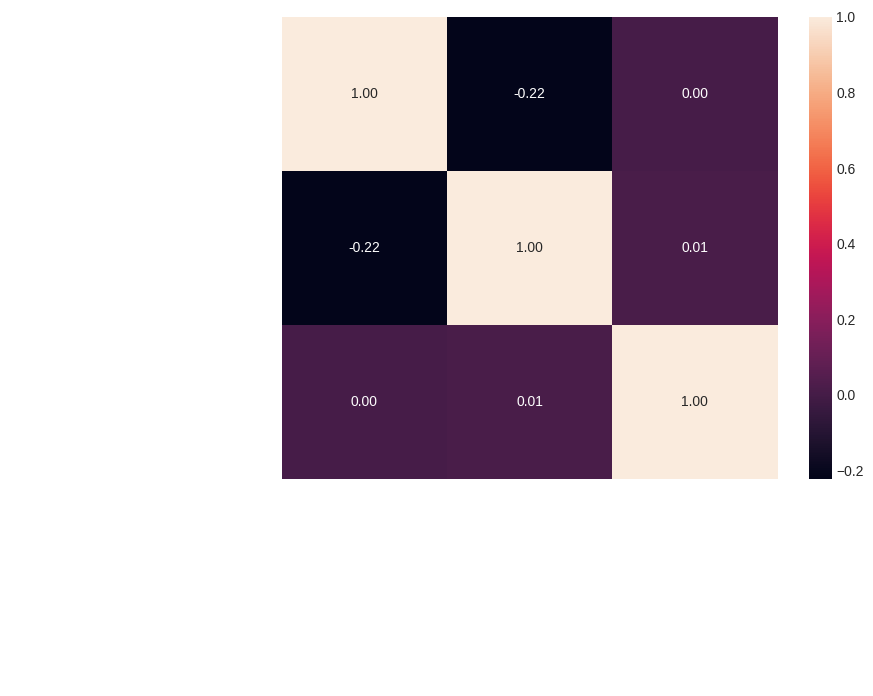

In [43]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt='.2f')

x_labels = df.corr(numeric_only=True).columns
y_labels = df.corr(numeric_only=True).index

plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels, rotation=0)

ax = plt.gca()
ax.tick_params(size=10, color='w', labelsize=10, labelcolor='w')

plt.show()

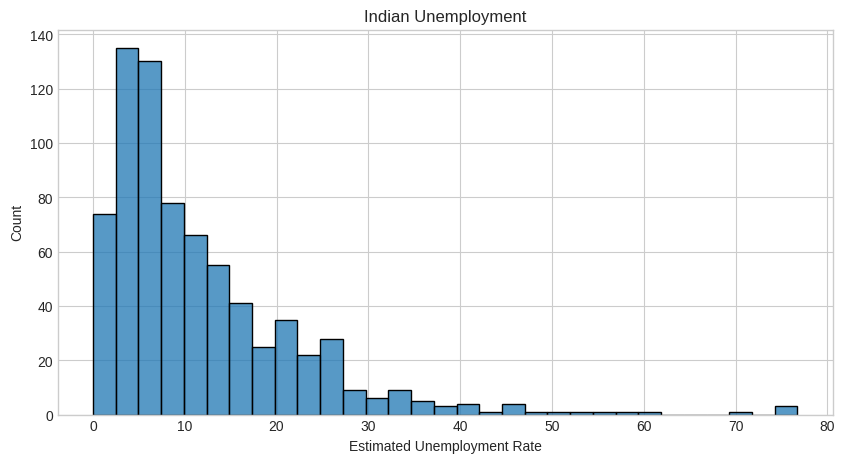

In [51]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 5))
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Unemployment Rate', data=df)
plt.show()

Region
Rural    3.659234e+09
Urban    1.672066e+09
Name: Estimated Employed, dtype: float64


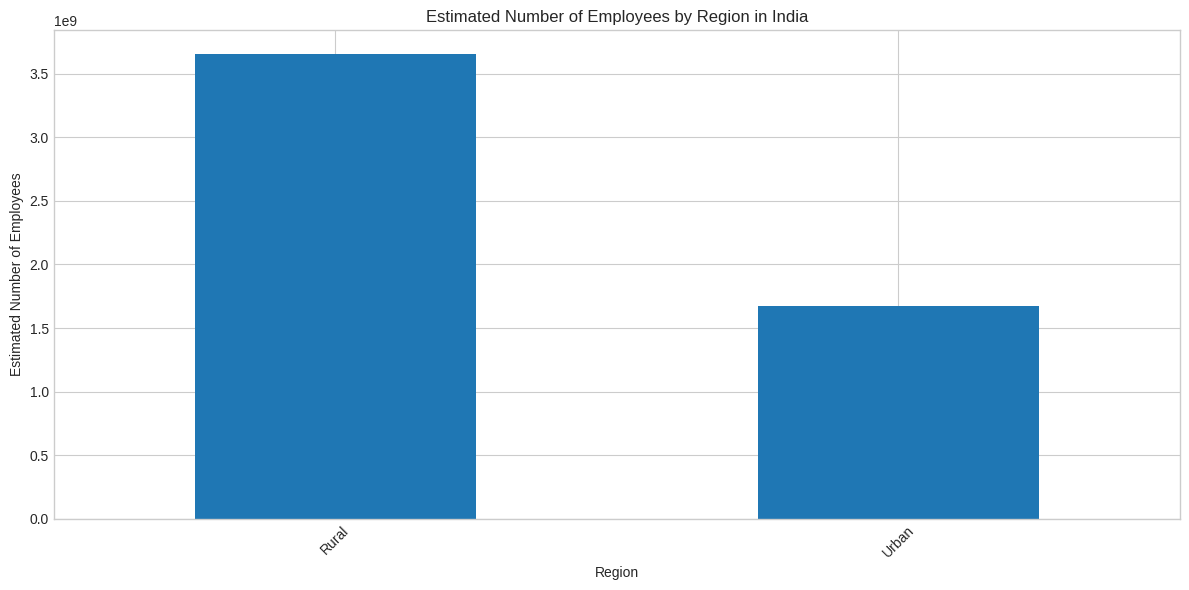

In [53]:
estimated_employees_by_region = df.groupby('Region')['Estimated Employed'].sum()

print(estimated_employees_by_region)

plt.figure(figsize=(12, 6))
estimated_employees_by_region.plot(kind='bar')
plt.title('Estimated Number of Employees by Region in India')
plt.xlabel('Region')
plt.ylabel('Estimated Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
state_unemployment = df.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

fig = px.pie(
    state_unemployment,
    values='Estimated Unemployment Rate',
    names='States',
    title='Unemployment Rate in Indian States',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    hover_data={'Estimated Unemployment Rate': True},
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig.show()